In [1]:
import sys
import numpy as np

sys.path.append("/data/Beatriz/Doctorado GR/ADL_platform/S-ADL")

from SADL.visualization_module import DataVisualization


2025-03-07 17:15:02.641514: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 17:15:02.642461: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-07 17:15:02.645722: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-07 17:15:02.654236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741364102.667829  469392 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741364102.67

#### Generate synthetic data

In [2]:
np.random.seed(42)
data = np.random.rand(100,5)   


vis = DataVisualization(data, plot_technique='heatmap', heatmap_color='viridis')
vis.fit()  
vis.show()  


In [6]:
from sklearn.datasets import make_blobs

# Generate sample data
data1, labels = make_blobs(n_samples=300, centers=3, random_state=42)

# Visualization with PCA and scatter plot
vis = DataVisualization(data1, plot_technique='scatter', dim_reduction_technique='PCA', 
                        color_map=labels, point_size=10, opacity=0.7)
vis.fit()
vis.show()

In [4]:
#Testing without dimensionality reduction

# Histogram
vis_hist = DataVisualization(data, plot_technique='hist')
vis_hist.fit()
vis_hist.show()

# Boxplot 
vis_box = DataVisualization(data, plot_technique='boxplot')
vis_box.fit()
vis_box.show()

# Heatmap 
vis_heatmap = DataVisualization(data, plot_technique='heatmap')
vis_heatmap.fit()
vis_heatmap.show()

In [14]:
#Testing with dimensionality reduction

# t-SNE
vis_tsne = DataVisualization(data, plot_technique='scatter', dim_reduction_technique='t-SNE', n_components=2)
vis_tsne.fit()
vis_tsne.show()

# UMAP
vis_umap = DataVisualization(data, plot_technique='scatter', dim_reduction_technique='UMAP', n_components=2)
vis_umap.fit()
vis_umap.show()

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



### Test with model AutoEncoder flexanomalies

In [40]:
from SADL.visualization_module import DataVisualization
from SADL.federated_data.algorithms import flexanomalies
from SADL.static_data.static_datasets_uci import global_load
from sklearn.model_selection import train_test_split

#from flexanomalies.utils.load_data import load_and_split_dot_mat
# X_train, X_test, y_train, y_test = load_and_split_dot_mat(
#     "/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/datasets/data/shuttle.mat", 0.3
# )

X,y = global_load('default_of_credit_card_clients')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

Metadata: {'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive ac

In [41]:
from SADL.federated_data.algorithms import flexanomalies

kwargs = {
    "algorithm_": "autoencoder",
    "contamination":0.1,
    "label_parser": None,
     "epochs": 100,
     "input_dim": X_train.shape[1],
     "batch_size": 8,
     "neurons": [16,8, 16],
     "hidden_act": ['relu', 'relu', 'relu'],
     "n_clients":2,
     "n_rounds":10,
     }

modelAE = flexanomalies.FlexAnomalyDetection(**kwargs)
print(modelAE.get_params())

Federated Params:{'n_clients': 2, 'n_rounds': 10} 
 Model Params:{'algorithm_': 'autoencoder', 'contamination': 0.1, 'label_parser': None, 'epochs': 100, 'input_dim': 23, 'batch_size': 8, 'neurons': [16, 8, 16], 'hidden_act': ['relu', 'relu', 'relu']}
Inspecting model's attributes:
contamination: 0.1
input_dim: 23
neurons: [16, 8, 16]
model_path: 
w_size: None
n_pred: 1
callbacks: [<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7c25325b64a0>]
hidden_act: ['relu', 'relu', 'relu']
output_act: linear
loss: mse
validation_size: 0.2
batch_size: 8
epochs: 100
optimizer: adam
preprocess: True
scaler: StandardScaler()
model: <Sequential name=sequential_13, built=True>
algorithm_: autoencoder
label_parser: None
{'label_parser': None, 'algorithm_': 'autoencoder', 'contamination': 0.1, 'input_dim': 23, 'neurons': [16, 8, 16], 'model_path': '', 'w_size': None, 'n_pred': 1, 'callbacks': [<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7c25325b64a0>], 'hidden_act': ['rel

/data/Beatriz/Doctorado GR/ADL_platform/S-ADL/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
from SADL.static_data.preprocessing.preprocessing_static import StandardScalerPreprocessing 
scaler = StandardScalerPreprocessing()
X_scaled = scaler.fit_transform(X_train)
vis = DataVisualization(X_scaled, plot_technique='scatter', dim_reduction_technique='PCA', n_components=2)
vis.fit()
vis.show()

In [43]:
modelAE.fit(X_train,y_train)

1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1130 - val_loss: 0.1727
Epoch 11/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1157 - val_loss: 0.1713
Epoch 12/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1140 - val_loss: 0.1804
Epoch 12: early stopping
Training model at client.
Epoch 1/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1155 - val_loss: 0.1095
Epoch 2/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1116 - val_loss: 0.1080
Epoch 3/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1134 - val_loss: 0.1089
Epoch 4/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1109 - val_loss: 0.1102
Epoch 5/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1143 - val_loss: 0.1098
Epoch 6/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1147 - val_loss: 0.1119
Epoch 7/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1123 - val_loss: 0.1081
Epoch 8/100
1080/1080 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1132

In [45]:
modelAE.predict(X_test)
modelAE.model.labels_

modelAE.evaluate(X_test,y_test)
print(modelAE.model.d_scores_)  


Inspecting model's attributes:
contamination: 0.1
input_dim: 23
neurons: [16, 8, 16]
model_path: 
w_size: None
n_pred: 1
callbacks: [<keras.src.callbacks.early_stopping.EarlyStopping object at 0x7c25325b64a0>]
hidden_act: ['relu', 'relu', 'relu']
output_act: linear
loss: mse
validation_size: 0.2
batch_size: 8
epochs: 100
optimizer: adam
preprocess: True
scaler: StandardScaler()
model: <Sequential name=sequential_13, built=True>
algorithm_: autoencoder
label_parser: None
d_scores_: [2.1034863  1.59258316 0.42479554 ... 1.69752116 0.964254   1.08148574]
labels_: [0. 0. 0. ... 0. 0. 0.]
result_metrics_: {'Accuracy': '72.817%', 'Precision': '0.247', 'F1': '0.154', 'Recall': '0.112', 'AUC_ROC': '0.507'}
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step
Acc: 72.817% 

Precision: 0.247 

F1score: 0.154 

Recall: 0.112 

AUC_ROC: 0.507 

[2.1034863  1.59258316 0.42479554 ... 1.69752116 0.964254   1.08148574]


In [47]:
true =np.array(y_test).flatten()
pred = np.array(modelAE.model.labels_).astype(int)

visualizer = DataVisualization(data=None, plot_technique='prediction_anomaly', y_true=true[40:60], y_pred=pred[40:60])
visualizer.show()

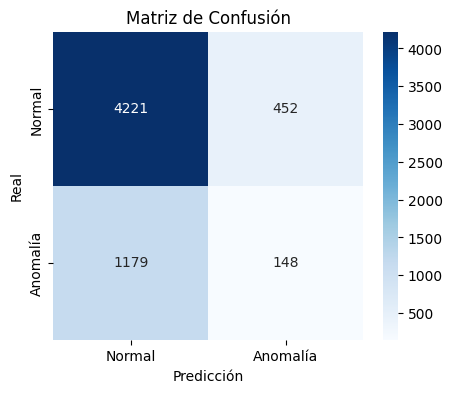

In [48]:

from SADL.metrics_module import plot_confusion_matrix
plot_confusion_matrix(true,pred)